In [30]:
import pandas as pd
import json
import os
import sys
import glob
import graph_tool.all as gt
from datetime import datetime, date, time
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import numpy as np
import math

statistics_dir = '/home/maniaa/ashes/code/statistics/'
stat_csv = [(statistics_dir + f) for f in listdir(statistics_dir) if (f.endswith(".csv") and isfile(join(statistics_dir, f)))]
stat_csv.sort()
stat_csv = stat_csv[1:]

In [37]:
def successful_execution_rate(file):
    df = pd.read_csv(file);
    total_jobs = len(df)
    df = df[df['state'] == 'SUCCEEDED']
    success_jobs = len(df)
    failed_jobs = total_jobs - success_jobs
    return success_jobs, failed_jobs, total_jobs

status = []
for index, file in enumerate(stat_csv):
    print(file)
    date = file.split('/')[-1].split('.csv')[0]
    
    s, f, t = successful_execution_rate(file)
    
    status.append({'date': date, 'successed' : s, 'failed' : f, 'total' : t})

df = pd.DataFrame(status)
df['failure_rate'] = 100*df['failed']/df['total']
df['success_rate'] = 100*df['successed']/df['total']

print(df['total'].sum(), df['successed'].sum())
failure_rate = round((1 - df['successed'].sum()/df['total'].sum())*100, 2)
print(failure_rate)

print(df)



/home/maniaa/ashes/code/statistics/08-02-2018.csv
/home/maniaa/ashes/code/statistics/08-03-2018.csv
/home/maniaa/ashes/code/statistics/08-04-2018.csv
/home/maniaa/ashes/code/statistics/08-05-2018.csv
/home/maniaa/ashes/code/statistics/08-06-2018.csv
/home/maniaa/ashes/code/statistics/08-07-2018.csv
/home/maniaa/ashes/code/statistics/08-08-2018.csv
/home/maniaa/ashes/code/statistics/08-09-2018.csv
/home/maniaa/ashes/code/statistics/08-10-2018.csv
/home/maniaa/ashes/code/statistics/08-11-2018.csv
/home/maniaa/ashes/code/statistics/08-12-2018.csv
/home/maniaa/ashes/code/statistics/08-13-2018.csv
/home/maniaa/ashes/code/statistics/08-14-2018.csv
/home/maniaa/ashes/code/statistics/08-15-2018.csv
/home/maniaa/ashes/code/statistics/08-16-2018.csv
/home/maniaa/ashes/code/statistics/08-17-2018.csv
/home/maniaa/ashes/code/statistics/08-18-2018.csv
/home/maniaa/ashes/code/statistics/08-19-2018.csv
/home/maniaa/ashes/code/statistics/08-20-2018.csv
/home/maniaa/ashes/code/statistics/08-21-2018.csv


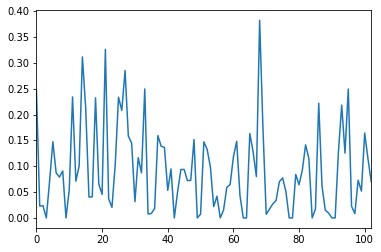

In [38]:
df['failure_rate'].plot()

In [20]:
def active_users_statistics(pfile):
    df = pd.read_csv(pfile);
    gdf = df.groupby('user.name',group_keys=True).size()
    return gdf.keys()


users = []
for index, file in enumerate(files):
    users.extend(active_users_statistics(file))
    print(index, file)


0 /home/maniaa/ashes/code/statistics/08-29-2018.csv
1 /home/maniaa/ashes/code/statistics/08-08-2018.csv
2 /home/maniaa/ashes/code/statistics/08-23-2018.csv
3 /home/maniaa/ashes/code/statistics/11-14-2018.csv
4 /home/maniaa/ashes/code/statistics/11-04-2018.csv
5 /home/maniaa/ashes/code/statistics/08-11-2018.csv
6 /home/maniaa/ashes/code/statistics/10-16-2018.csv
7 /home/maniaa/ashes/code/statistics/09-09-2018.csv
8 /home/maniaa/ashes/code/statistics/09-23-2018.csv
9 /home/maniaa/ashes/code/statistics/08-28-2018.csv
10 /home/maniaa/ashes/code/statistics/08-27-2018.csv
11 /home/maniaa/ashes/code/statistics/08-24-2018.csv
12 /home/maniaa/ashes/code/statistics/09-18-2018.csv
13 /home/maniaa/ashes/code/statistics/10-09-2018.csv
14 /home/maniaa/ashes/code/statistics/08-10-2018.csv
15 /home/maniaa/ashes/code/statistics/10-28-2018.csv
16 /home/maniaa/ashes/code/statistics/09-12-2018.csv
17 /home/maniaa/ashes/code/statistics/10-08-2018.csv
18 /home/maniaa/ashes/code/statistics/09-10-2018.csv
19 

In [25]:
import numpy as np

print(len(np.unique(np.array(users))))

178
